# **Lista 5** 
### Rafał Głodek
***

Zadanie 1

In [2]:
def mix_func1(i):
    """
    Function
    Funkcja mieszająca

    Input
    i(float) - klucz, którą dodajemy do tablicy asocjacyjnej

    Output
    (integer) - indeks klucza
    """
    return (3 * i + 5) % 11

In [3]:
input = [12, 44, 13, 88, 23, 94, 11, 39, 20, 16, 5]

In [43]:
def chain_rule(func, arr, size):
    """
    Function
    Implementacja tablicy asocjacyjnej rozwiązującej kolizje metodą łańcuchową

    Input
    func(function) - funkcja mieszająca
    arr(list) - lista kluczy
    size(int) - rozmiar tablicy

    Output
    hash_table(list) - wizualizacja tablicy asocjacyjnej
    """
    hash_table = [[] for i in range(size)]
    for num in arr:
        h = func(num)
        hash_table[h].append(num)
    return hash_table

In [44]:
print(chain_rule(mix_func1, input, 11))

[[13], [94, 39], [], [], [], [44, 88, 11], [], [], [12, 23], [16, 5], [20]]


Zadanie 2

In [45]:
def rehash(pos, size):
    """
    Function
    Funkcja hashująca

    Input 
    pos(int) - wyliczony przez funkcję mieszającą indeks klucza
    size(int) - rozmiar tablicy asocjacyjnej

    Output
    (integer) - nowy indeks klucza
    """
    return ((pos + 1) % size)

In [46]:
def linear_probing(func, arr, size):
    """
    Function
    Implementacja tablicy asocjacyjnej rozwiązującej kolizje próbkowaniem liniowym

    Input
    func(function) - funkcja mieszająca
    arr(list) - lista kluczy
    size(int) - rozmiar tablicy

    Output
    hash_table(list) - wizualizacja tablicy asocjacyjnej
    """
    hash_table = [[] for i in range(size)]
    for num in arr:
        h = func(num)
        n = 1
        while len(hash_table[h]) != 0:
            h = rehash(h, size)
        hash_table[h].append(num)
    return hash_table

In [47]:
print(linear_probing(mix_func1, input, 11))

[[13], [94], [39], [16], [5], [44], [88], [11], [12], [23], [20]]


Zadanie 3

In [1]:
def mix_func2(i):
    """
    Function
    Funkcja mieszająca

    Input
    i(float) - klucz, którą dodajemy do tablicy asocjacyjnej

    Output
    (integer) - indeks klucza
    """
    return (7 - (i % 7))


In [4]:
def func_collision(func, arr, size):
    """
    Function
    Implementacja tablicy asocjacyjnej rozwiązującej kolizje za pomocą drugiej funkcji mieszającej

    Input
    func(function) - funkcja mieszająca
    arr(list) - lista kluczy
    size(int) - rozmiar tablicy

    Output
    hash_table(list) - wizualizacja tablicy asocjacyjnej
    """
    hash_table = [[] for i in range(size)]
    for num in arr:
        h = func(num)
        while len(hash_table[h]) != 0:
            if len(hash_table[h]) != 0:
                h = (h + mix_func2(num)) % size
        hash_table[h].append(num)
    return hash_table

In [5]:
print(func_collision(mix_func1, input, 11))

[[13], [94], [23], [88], [39], [44], [11], [5], [12], [16], [20]]


Zadanie 4

Binarne drzewo wyszukiwań

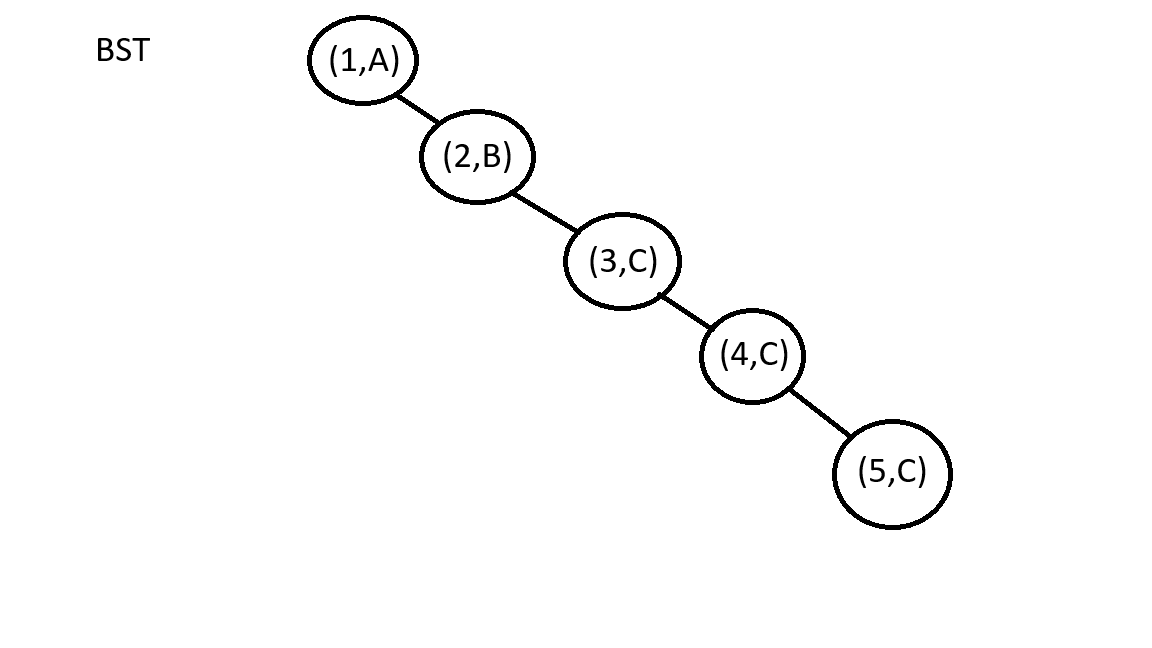

In [22]:

from PIL import Image
from IPython.display import display
img = Image.open("bst3.png")
display(img)

Kopiec

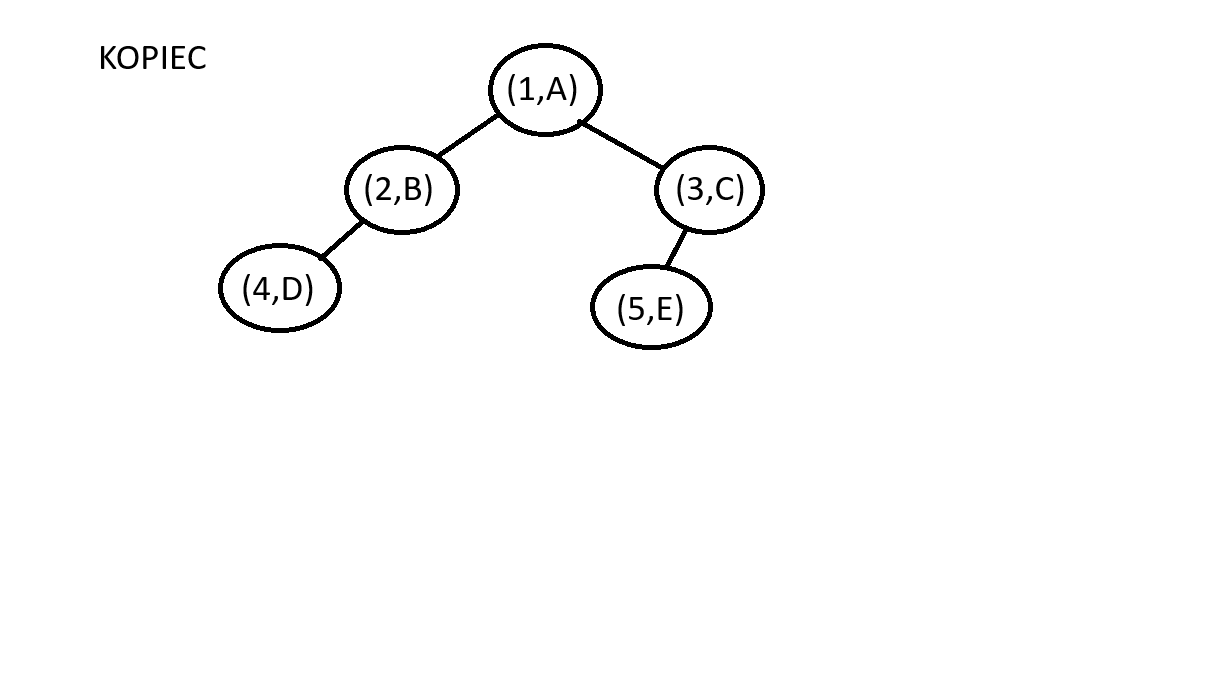

In [3]:
img2 = Image.open("kopiec3.png")
display(img2)

Zadanie 5

In [33]:
frames = ["drzewo1.png", "drzewo2.png", "drzewo3.png", "drzewo4.png", "drzewo5.png", "drzewo6.png", "drzewo7.png", "drzewo8.png"]
import imageio.v2 as imageio
images = []
for filename in frames:
    images.append(imageio.imread(filename))
imageio.mimsave(r'C:\Users\Rafal\OneDrive\Dokumenty\GitHub\AiSD\lista5\movie.gif', images, loop = 0, duration = 1, fps=1)

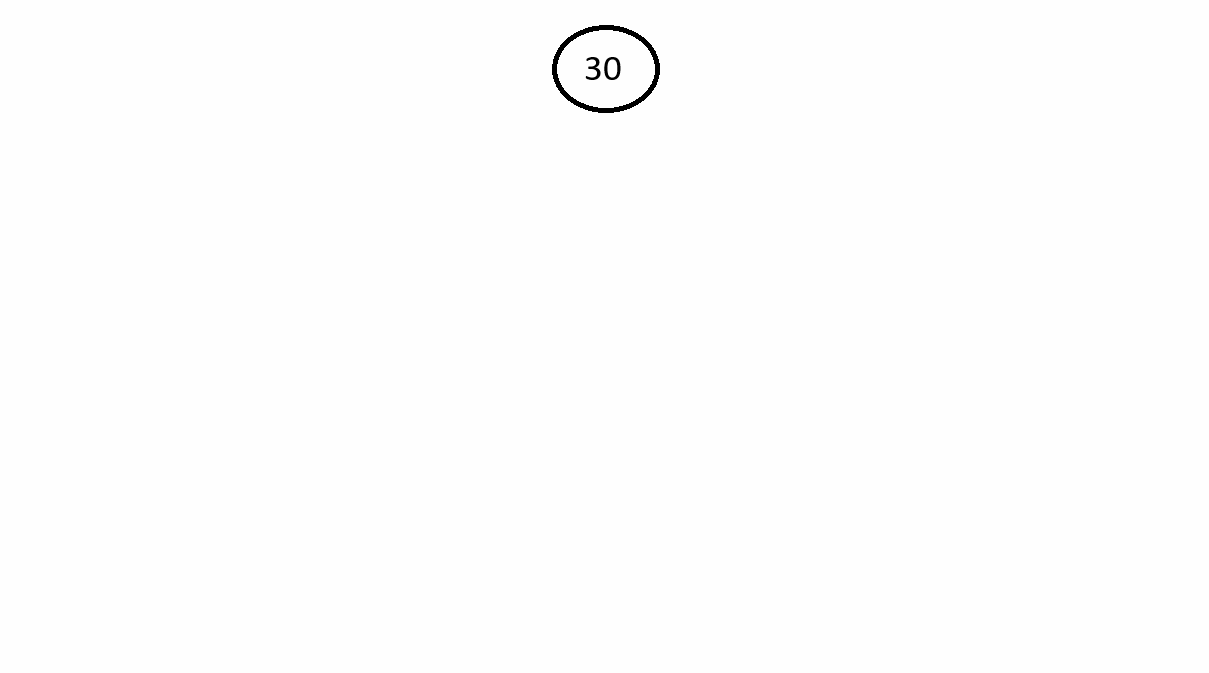

In [39]:
frames2 = ["kopiec_1.png", "kopiec_2.png","kopiec_3.png","kopiec_4.png","kopiec_5.png","kopiec_6.png","kopiec_7.png","kopiec_8.png","kopiec_9.png","kopiec_10.png","kopiec_11.png","kopiec_12.png","kopiec_13.png","kopiec_14.png"]
images2 = []
for filename in frames2:
    images2.append(imageio.imread(filename))
imageio.mimsave(r'C:\Users\Rafal\OneDrive\Dokumenty\GitHub\AiSD\lista5\movie2.gif', images2, loop = 0, duration = 1, fps=1)

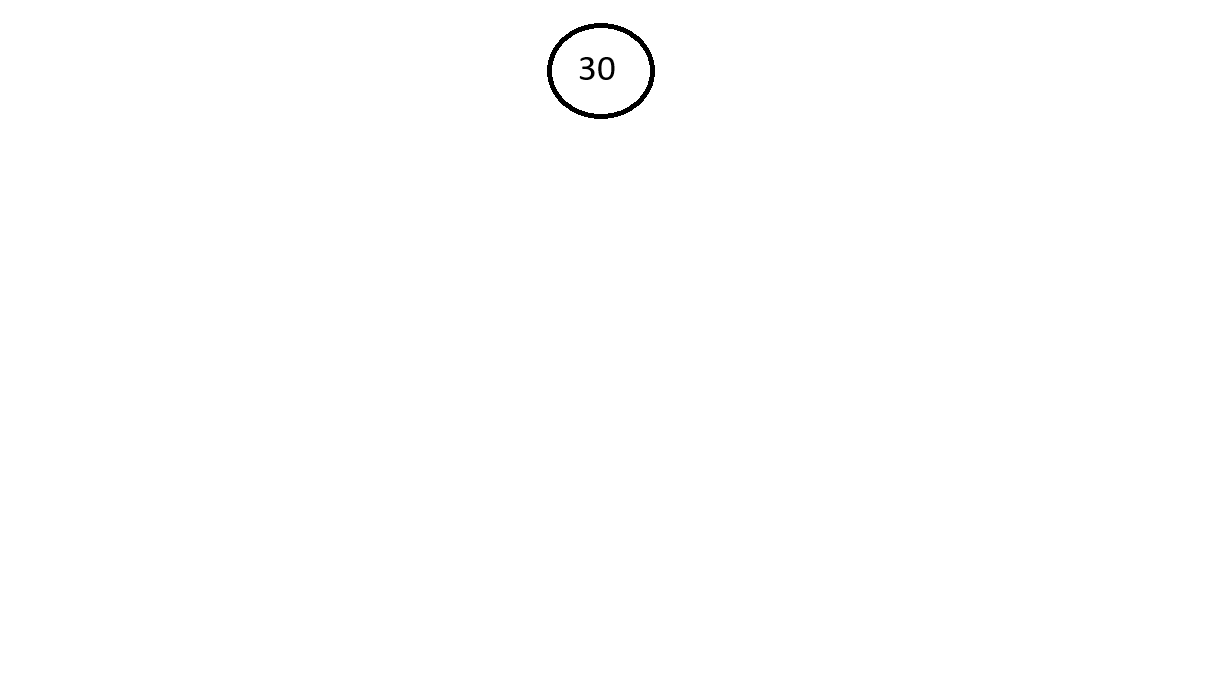

Zadanie 6

In [1]:
class Empty(Exception):
    pass


class Stack:
    def __init__(self):
        self._data = [] #nowy pusty stos

    def __len__(self):
        return len(self._data)

    def is_empty(self):
        return len(self._data)==0

    def push(self,e):
        self._data.append(e)

    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]

    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop() 
    
    def __str__(self):
        return str(self._data)

In [4]:
def quicksort(arr):
    """
    Implementacja iteracyjnego i in-place algorytmu quicksort

    Input
    arr(list) - lista, którą chcemy posortować

    Output
    arr(list) - posortowana lista
    """
    s = Stack() #tworzymy stos
    ind_p = 0
    ind_k = len(arr) - 1
    s.push(ind_p)
    s.push(ind_k)

    while not s.is_empty(): #powtarzamy dopóki stos nie będzie pusty
        ind_k = s.pop()
        ind_p = s.pop()

        pivot = arr[ind_k]
        piv_ind = ind_p

        for i in range(ind_p, ind_k): #iterujemy od początku do końca
            if arr[i] <= pivot: #sprawdzamy czy dany element jest mniejszy niż piwot
                arr[i], arr[piv_ind] = arr[piv_ind], arr[i] #jeśli tak to dajemy go na lewo od piwotu
                piv_ind += 1
                
        arr[piv_ind], arr[ind_k] = arr[ind_k], arr[piv_ind] #jeśli nie to zmieniamy piwot 
        pivot = piv_ind
        
        if pivot - 1 > ind_p: #jeśli dochodzimy z prawej strony do początku to wstawiamy indeksy na stos
            s.push(ind_p)
            s.push(pivot-1)
        
        if pivot + 1 < ind_k: #jeśli dochodzimy z lewej strony do końca to wstawiamy indeksy na stos
            s.push(pivot+1)
            s.push(ind_k)
    return arr

        

In [5]:
print(quicksort([9, -3, 5, 2, 6, 8, -6, 1, 3]))

[-6, -3, 1, 2, 3, 5, 6, 8, 9]


Zadanie 7

In [63]:
import numpy as np 

import matplotlib.pyplot as plt



In [64]:
def bubbleSort(arr): #przykładowa implementacja algorytmu sortowania bąbelkowego
    xs = np.arange(0,len(arr),1)
    n = len(arr)

    swapped = False

    plt.bar(xs, arr)
    plt.savefig(r"C:\Users\Rafal\OneDrive\Dokumenty\GitHub\AiSD\lista5\frames\fig0")
    plt.clf()

    k = 1

    for i in range(n-1):

        for j in range(0, n-i-1):
 
            if arr[j] > arr[j + 1]:
                swapped = True
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                plt.bar(xs, arr)
                plt.savefig(r"C:\Users\Rafal\OneDrive\Dokumenty\GitHub\AiSD\lista5\frames\fig" + str(k* "1"))
                k += 1
                plt.clf()
         
        if not swapped:

            return 
    plt.bar(xs, arr)
    plt.savefig(r"C:\Users\Rafal\OneDrive\Dokumenty\GitHub\AiSD\lista5\frames\fig2")



In [65]:
array = [64, 34, 25, 12, 22, 11, 90]
bubbleSort(array)


<IPython.core.display.Javascript object>

In [66]:
import os
images3 = []
for root, dirs, files in os.walk(r"C:\Users\Rafal\OneDrive\Dokumenty\GitHub\AiSD\lista5\frames"):
    for filename in files:
        images3.append(imageio.imread(os.path.join(root,filename)))
imageio.mimsave(r'C:\Users\Rafal\OneDrive\Dokumenty\GitHub\AiSD\lista5\movie3.gif', images3, loop = 0, duration = 1, fps=1)
    

['fig0.png', 'fig1.png', 'fig11.png', 'fig111.png', 'fig1111.png', 'fig11111.png', 'fig111111.png', 'fig1111111.png', 'fig11111111.png', 'fig111111111.png', 'fig1111111111.png', 'fig11111111111.png', 'fig111111111111.png', 'fig1111111111111.png', 'fig11111111111111.png', 'fig2.png']


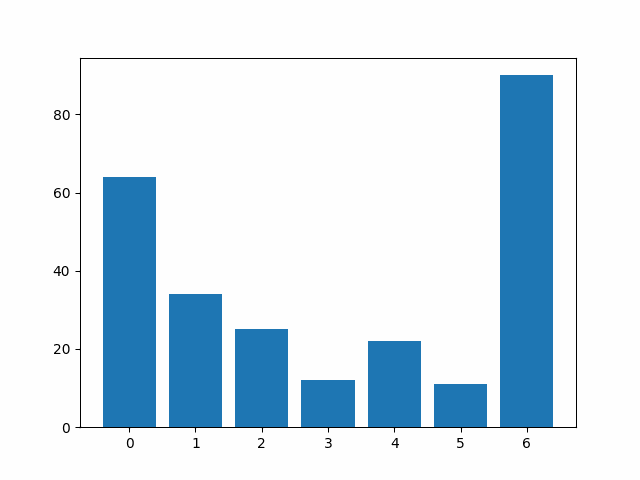